<a href="https://colab.research.google.com/github/gadm21/AI/blob/master/Data_science/Adv_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project: Gapminder World datasets**

In [ ]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

##**Q1. How is democracy affected by number of internet users?**
###dataset 1 : democracy index by the Economist Inteligence Unit (EIU)
###dataset 2 : internet users by the worldbank 

In [ ]:
#downloads democracy index, internet users, and unemployment rate datasets
def download_datasets_1():
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1i_rv9kx0ke6TwQG_9td7kYnsNue9twhB' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1i_rv9kx0ke6TwQG_9td7kYnsNue9twhB" -O unemployment.csv && rm -rf /tmp/cookies.txt
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Xp_qs0tCScrd4MRW2BrPrwbqyL_n2dz6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Xp_qs0tCScrd4MRW2BrPrwbqyL_n2dz6" -O internet_users.csv && rm -rf /tmp/cookies.txt
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15wjW7fo-ok0BGFW5nhQXKvYHMK00ypY-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15wjW7fo-ok0BGFW5nhQXKvYHMK00ypY-" -O democracy.csv && rm -rf /tmp/cookies.txt

#trims the years earlier than 2006 from internet users dataset
def trim_dataset(df, first_column):
  #firstly, to groupby country easlier, lets standardize country names
  df.country = df.country.apply(lambda x : x.replace(' ', '_').lower())
  newdf = df.set_index('country') 
  #Then, we trim the first part of the dataset, by droping columns with names before the given 'first_column' valriable.
  for col in newdf.columns:
    if int(col) < first_column: 
      newdf.drop(col, axis=1, inplace=True) 
  return newdf

#chooses the row which belongs to the given country and splits columns into democracy index data and internet users data, 
#then, plots them on line plot
def split_and_draw(df, country):
  dem = df.loc[country, [col for col in df.columns if 'dem' in col] ]
  intt = df.loc[country, [col for col in df.columns if 'int' in col] ]
  #normalize to be able to see the tiny change in democracy index
  dem = dem / np.linalg.norm(dem) 
  intt = intt / np.linalg.norm(intt) 
  plt.plot(np.arange(6,19), dem, label='democracy (normalized)');
  plt.plot(np.arange(6,19), intt, label='internet users (normalized)');
  plt.xlabel('years') 
  plt.ylabel('normalized percentage')
  plt.title(country) 
  plt.legend()


In [ ]:
%%capture
#download datasets 
download_datasets_1()

#read the datasets of democracy and internet users
dem_df = pd.read_csv('democracy.csv') 
int_df = pd.read_csv('internet_users.csv') 

In [ ]:
dem_df.head()

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.306,0.304,0.302,0.275,0.248,0.248,0.248,0.248,0.277,0.277,0.255,0.255,0.297
1,Albania,0.591,0.591,0.591,0.589,0.586,0.581,0.567,0.567,0.567,0.591,0.591,0.598,0.598
2,Algeria,0.317,0.325,0.332,0.338,0.344,0.344,0.383,0.383,0.383,0.395,0.356,0.356,0.350
3,Angola,0.241,0.288,0.335,0.334,0.332,0.332,0.335,0.335,0.335,0.335,0.340,0.362,0.362
4,Argentina,0.663,0.663,0.663,0.673,0.684,0.684,0.684,0.684,0.684,0.702,0.696,0.696,0.702


In [ ]:
dem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  164 non-null    object 
 1   2006     164 non-null    float64
 2   2007     164 non-null    float64
 3   2008     164 non-null    float64
 4   2009     164 non-null    float64
 5   2010     164 non-null    float64
 6   2011     164 non-null    float64
 7   2012     164 non-null    float64
 8   2013     164 non-null    float64
 9   2014     164 non-null    float64
 10  2015     164 non-null    float64
 11  2016     164 non-null    float64
 12  2017     164 non-null    float64
 13  2018     164 non-null    float64
dtypes: float64(13), object(1)
memory usage: 18.1+ KB


In [ ]:
dem_df.describe()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.550591,0.552229,0.553762,0.549543,0.545232,0.548055,0.550134,0.551378,0.552799,0.553134,0.549823,0.545384,0.546061
std,0.227059,0.226048,0.225813,0.224348,0.224033,0.219270,0.220242,0.220460,0.218922,0.220598,0.220813,0.220017,0.221183
min,0.103000,0.094500,0.086000,0.097000,0.108000,0.108000,0.108000,0.108000,0.108000,0.108000,0.108000,0.108000,0.108000
25%,0.341000,0.347500,0.345750,0.347000,0.341000,0.352000,0.355000,0.352000,0.352750,0.365000,0.355500,0.361000,0.346500
50%,0.585500,0.588500,0.585000,0.580500,0.585000,0.584000,0.585000,0.584000,0.577500,0.574000,0.571000,0.566000,0.566000
75%,0.737250,0.737250,0.735250,0.726250,0.721250,0.717500,0.718000,0.725250,0.739250,0.731000,0.725250,0.720000,0.716750
max,0.988000,0.988000,0.988000,0.974000,0.980000,0.980000,0.993000,0.993000,0.993000,0.993000,0.993000,0.987000,0.987000


In [ ]:
dem_df.country.nunique()

164

In [ ]:
#to make it easier to taget data by country, make country name easlier to type
dem_df.country = dem_df.country.apply(lambda x : x.replace(' ', '_').lower())
#set index to be the country instead of numbers
dem_df.set_index('country', inplace= True) 
dem_df.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,
afghanistan,0.306,0.304,0.302,0.275,0.248,0.248,0.248,0.248,0.277,0.277,0.255,0.255,0.297
albania,0.591,0.591,0.591,0.589,0.586,0.581,0.567,0.567,0.567,0.591,0.591,0.598,0.598
algeria,0.317,0.325,0.332,0.338,0.344,0.344,0.383,0.383,0.383,0.395,0.356,0.356,0.350
angola,0.241,0.288,0.335,0.334,0.332,0.332,0.335,0.335,0.335,0.335,0.340,0.362,0.362
argentina,0.663,0.663,0.663,0.673,0.684,0.684,0.684,0.684,0.684,0.702,0.696,0.696,0.702


### Minimum, Maximum, and std have reasonable values
### No NaNs, No duplicate countries 
##Democracy dataset is clean







---



---



---



## checking the second dataset

###since the democracy dataset starts from 2006, we'll trim internet usage dataset to also start from 2006

In [ ]:
#remove columns of data before the year 2006
short_int_df = trim_dataset(int_df, 2006)
short_int_df.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,
afghanistan,2.11,1.90,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,11.2,13.5,NaN
albania,9.61,15.00,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,71.8,NaN
algeria,7.38,9.45,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,47.7,49.0
andorra,48.90,70.90,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9,91.6,NaN
angola,1.50,1.70,1.90,2.30,2.8,3.1,6.50,8.9,21.4,12.40,13.0,14.3,NaN


In [ ]:
short_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, afghanistan to zimbabwe
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2006    184 non-null    float64
 1   2007    191 non-null    float64
 2   2008    190 non-null    float64
 3   2009    189 non-null    float64
 4   2010    189 non-null    float64
 5   2011    192 non-null    float64
 6   2012    189 non-null    float64
 7   2013    190 non-null    float64
 8   2014    190 non-null    float64
 9   2015    190 non-null    float64
 10  2016    190 non-null    float64
 11  2017    192 non-null    float64
 12  2018    79 non-null     float64
dtypes: float64(13)
memory usage: 21.2+ KB


### Then, we can see missing value, I will use linear regression imputation to fill in these. Why? because gradual increase or decrease in the number of internet users is more realistic than having a static average number.

###Interpolation is performed per country.

In [ ]:
#use linear regression to fill missing values
short_int_df.interpolate(method='linear', inplace=True, limit_direction='both', axis=1)

In [ ]:
short_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, afghanistan to zimbabwe
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2006    193 non-null    float64
 1   2007    193 non-null    float64
 2   2008    193 non-null    float64
 3   2009    193 non-null    float64
 4   2010    193 non-null    float64
 5   2011    193 non-null    float64
 6   2012    193 non-null    float64
 7   2013    193 non-null    float64
 8   2014    193 non-null    float64
 9   2015    193 non-null    float64
 10  2016    193 non-null    float64
 11  2017    193 non-null    float64
 12  2018    193 non-null    float64
dtypes: float64(13)
memory usage: 21.2+ KB


In [ ]:
short_int_df.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,
afghanistan,2.11,1.90,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,11.2,13.5,13.5
albania,9.61,15.00,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,71.8,71.8
algeria,7.38,9.45,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,47.7,49.0
andorra,48.90,70.90,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9,91.6,91.6
angola,1.50,1.70,1.90,2.30,2.8,3.1,6.50,8.9,21.4,12.40,13.0,14.3,14.3


In [ ]:
#find the row which contains ANY missing values
short_int_df[short_int_df.isnull().any(axis=1)]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,
palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### so Palau has no data at all, lets drop it!

In [ ]:
#drop the index 'palau' which contains NaN values
short_int_df.drop('palau', inplace=True)
short_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, afghanistan to zimbabwe
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2006    193 non-null    float64
 1   2007    193 non-null    float64
 2   2008    193 non-null    float64
 3   2009    193 non-null    float64
 4   2010    193 non-null    float64
 5   2011    193 non-null    float64
 6   2012    193 non-null    float64
 7   2013    193 non-null    float64
 8   2014    193 non-null    float64
 9   2015    193 non-null    float64
 10  2016    193 non-null    float64
 11  2017    193 non-null    float64
 12  2018    193 non-null    float64
dtypes: float64(13)
memory usage: 21.1+ KB


### Now the two data are cleaned and we're ready to merge them

###we will firstly rename columns in each dataset to identify it after merging

In [ ]:
#rename democracy index columns to start with 'dem_' and internet users columns to start with 'int_'
dem_df.columns = ['dem_'+col for col in dem_df.columns] 
short_int_df.columns = ['int_'+col for col in short_int_df.columns] 

print(dem_df.columns) 
print() 
print(short_int_df.columns)

Index(['dem_2006', 'dem_2007', 'dem_2008', 'dem_2009', 'dem_2010', 'dem_2011',
       'dem_2012', 'dem_2013', 'dem_2014', 'dem_2015', 'dem_2016', 'dem_2017',
       'dem_2018'],
      dtype='object')

Index(['int_2006', 'int_2007', 'int_2008', 'int_2009', 'int_2010', 'int_2011',
       'int_2012', 'int_2013', 'int_2014', 'int_2015', 'int_2016', 'int_2017',
       'int_2018'],
      dtype='object')


In [ ]:
#Inner merging the 'democracy index' and 'internet users' dataset
dem_int_df = pd.merge(dem_df, short_int_df, left_index=True, right_index=True)
dem_int_df.head()

,dem_2006,dem_2007,dem_2008,dem_2009,dem_2010,dem_2011,dem_2012,dem_2013,dem_2014,dem_2015,dem_2016,dem_2017,dem_2018,int_2006,int_2007,int_2008,int_2009,int_2010,int_2011,int_2012,int_2013,int_2014,int_2015,int_2016,int_2017,int_2018
country,,,,,,,,,,,,,,,,,,,,,,,,,,
afghanistan,0.306,0.304,0.302,0.275,0.248,0.248,0.248,0.248,0.277,0.277,0.255,0.255,0.297,2.11,1.90,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,11.2,13.5,13.5
albania,0.591,0.591,0.591,0.589,0.586,0.581,0.567,0.567,0.567,0.591,0.591,0.598,0.598,9.61,15.00,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,71.8,71.8
algeria,0.317,0.325,0.332,0.338,0.344,0.344,0.383,0.383,0.383,0.395,0.356,0.356,0.350,7.38,9.45,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,47.7,49.0
angola,0.241,0.288,0.335,0.334,0.332,0.332,0.335,0.335,0.335,0.335,0.340,0.362,0.362,1.50,1.70,1.90,2.30,2.8,3.1,6.50,8.9,21.4,12.40,13.0,14.3,14.3
argentina,0.663,0.663,0.663,0.673,0.684,0.684,0.684,0.684,0.684,0.702,0.696,0.696,0.702,20.90,25.90,28.10,34.00,45.0,51.0,55.80,59.9,64.7,68.00,71.0,74.3,74.3


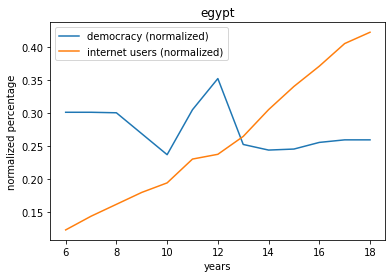

In [ ]:
#plot democracy index vs percentage of internet users (both normalized) for Egypt
split_and_draw(dem_int_df, 'egypt') 



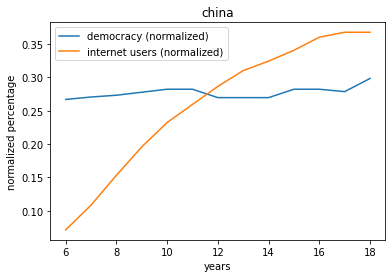

In [ ]:
#plot democracy index vs percentage of internet users (both normalized) for China
split_and_draw(dem_int_df, 'china')

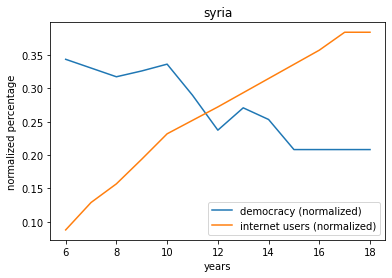

In [ ]:
#plot democracy index vs percentage of internet users (both normalized) for Syria
split_and_draw(dem_int_df, 'syria')

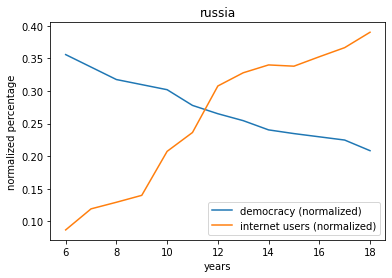

In [ ]:
#plot democracy index vs percentage of internet users (both normalized) for Russia
split_and_draw(dem_int_df, 'russia')

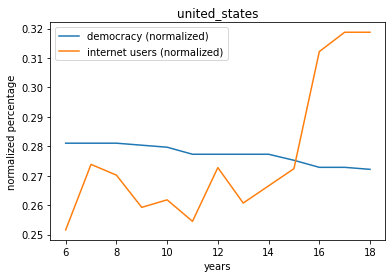

In [ ]:
#plot democracy index vs percentage of internet users (both normalized) for United States
split_and_draw(dem_int_df, 'united_states')

## NOTE: The y-axis scale is not percentage. The plots are normalized so that we can compare the trend (rising or falling) not the actual value, because democracy index changes so slowly that we wont be able to see its direction if it's plotted, without normalization, with internet users.


---

## From the plots, we can see that there are no correlation between democracy index and number of users in a country. 



---

##**Q2. Which country witnessed the highest increase in democracy from 2006 to 2008? and which had the highest decrease?**

In [ ]:
dem_df.head()

,dem_2006,dem_2007,dem_2008,dem_2009,dem_2010,dem_2011,dem_2012,dem_2013,dem_2014,dem_2015,dem_2016,dem_2017,dem_2018
country,,,,,,,,,,,,,
afghanistan,0.306,0.304,0.302,0.275,0.248,0.248,0.248,0.248,0.277,0.277,0.255,0.255,0.297
albania,0.591,0.591,0.591,0.589,0.586,0.581,0.567,0.567,0.567,0.591,0.591,0.598,0.598
algeria,0.317,0.325,0.332,0.338,0.344,0.344,0.383,0.383,0.383,0.395,0.356,0.356,0.350
angola,0.241,0.288,0.335,0.334,0.332,0.332,0.335,0.335,0.335,0.335,0.340,0.362,0.362
argentina,0.663,0.663,0.663,0.673,0.684,0.684,0.684,0.684,0.684,0.702,0.696,0.696,0.702


In [ ]:
#calculate the difference in democracy index between each consecutive years for each country
change_in_dem_df = dem_df.diff(axis=1).sum(axis=1)
change_in_dem_df.head()

country
afghanistan   -0.009
albania        0.007
algeria        0.033
angola         0.121
argentina      0.039
dtype: float64

In [ ]:
print('And the democracy paradise prize goes to...')
change_in_dem_df.idxmax()
print('with {} increase from 2006 to 2018'.format(change_in_dem_df.max()))

And the democracy paradise prize goes to...
with 0.3349999999999999 increase from 2006 to 2018


In [ ]:
print('And the democracy hell prize goes to...')
change_in_dem_df.idxmin()
print('with {} decrease from 2006 to 2018'.format(change_in_dem_df.min()))

And the democracy hell prize goes to...
with -0.22600000000000003 decrease from 2006 to 2018


##**Q3. Is there employment equity in Egypt?**



---
###dataset 3: unemployment rate dataset by ILO


In [ ]:
#reading the unemployment percentage dataset
unemp_df = pd.read_csv("unemployment.csv")
unemp_df.head()

,ref_area,indicator,source,sex,classif1,time,obs_value,obs_status,note_classif,note_indicator,note_source
0,AFG,SDG_0852_SEX_AGE_RT,BB:6361,SEX_T,AGE_YTHADULT_YGE15,2014,7.9145,NaN,NaN,NaN,R1:3513
1,AFG,SDG_0852_SEX_AGE_RT,BB:6361,SEX_T,AGE_YTHADULT_Y15-64,2014,7.9640,NaN,NaN,NaN,R1:3513
2,AFG,SDG_0852_SEX_AGE_RT,BB:6361,SEX_T,AGE_YTHADULT_Y15-24,2014,9.9628,NaN,NaN,NaN,R1:3513
3,AFG,SDG_0852_SEX_AGE_RT,BB:6361,SEX_T,AGE_YTHADULT_YGE25,2014,6.7730,NaN,NaN,NaN,R1:3513
4,AFG,SDG_0852_SEX_AGE_RT,BB:6361,SEX_M,AGE_YTHADULT_YGE15,2014,7.1962,NaN,NaN,NaN,R1:3513


In [ ]:
unemp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23278 entries, 0 to 23277
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area        23278 non-null  object 
 1   indicator       23278 non-null  object 
 2   source          23278 non-null  object 
 3   sex             23278 non-null  object 
 4   classif1        23278 non-null  object 
 5   time            23278 non-null  int64  
 6   obs_value       23260 non-null  float64
 7   obs_status      1807 non-null   object 
 8   note_classif    377 non-null    object 
 9   note_indicator  1821 non-null   object 
 10  note_source     18936 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.0+ MB


In [ ]:
#Extract only relevant features in a new data frame
egy_unemp_df = unemp_df[unemp_df.ref_area=='EGY'][['sex', 'time', 'obs_value', 'classif1']]

In [ ]:
egy_unemp_df.head()

,sex,time,obs_value,classif1
5570,SEX_T,2000,8.98,AGE_YTHADULT_YGE15
5571,SEX_M,2000,5.06,AGE_YTHADULT_YGE15
5572,SEX_F,2000,22.73,AGE_YTHADULT_YGE15
5573,SEX_T,2001,9.26,AGE_YTHADULT_YGE15
5574,SEX_T,2001,9.43,AGE_YTHADULT_Y15-64


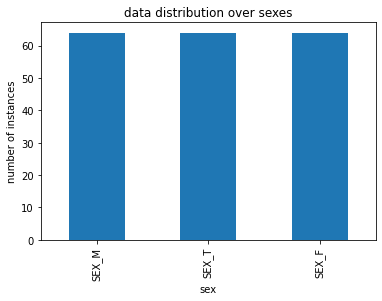

In [ ]:
#How data is distributed over sexes
egy_unemp_df.sex.value_counts().plot(kind='bar')
plt.xlabel('sex') 
plt.ylabel('number of instances')
plt.title('data distribution over sexes');

### Since this dataset has no documentation on the site, I can't determine what SEX_T or SEX_O are. Maybe transexual and other, but I am not sure. Thus, I will drop both  

In [ ]:
#Drop the un-understood sex type
egy_unemp_df.drop(egy_unemp_df[egy_unemp_df.sex=='SEX_T'].index, inplace=True) 
egy_unemp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 5571 to 5761
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        128 non-null    object 
 1   time       128 non-null    int64  
 2   obs_value  128 non-null    float64
 3   classif1   128 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ KB


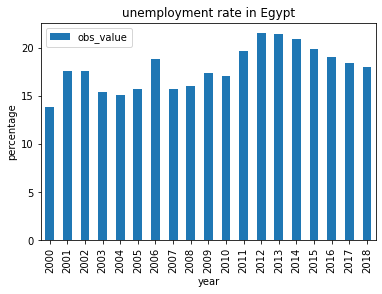

In [ ]:
#plot unemployment rate in Egypt over years
timely_egy_unemp_df = egy_unemp_df.groupby(['time']).mean()
timely_egy_unemp_df.plot(kind='bar')
plt.ylabel('percentage')
plt.xlabel('year') 
plt.title('unemployment rate in Egypt');

### So the total average is about 17%. This is actually much higher than what we expect. My assumption is that there might be sub categories that are leveraging the average as such.


---
### Now, to answer our question, lets plot unemployment rate for each gender


In [ ]:
#groupby time and sex for unemployment rate in Egypt
timely_egy_unemp_df = egy_unemp_df.groupby(['time', 'sex']).mean()
timely_egy_unemp_df.head()

obs_value
time sex             
2000 SEX_F    22.7300
     SEX_M     5.0600
2001 SEX_F    26.9825
     SEX_M     8.2825
2002 SEX_F    26.1575

Female average unemployment rate: 26.416138157894736
Male average unemployment rate: 9.333735526315788


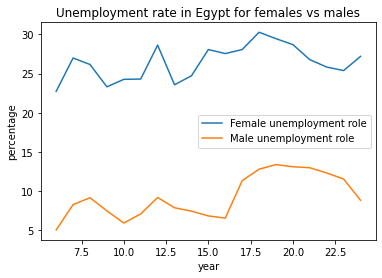

In [ ]:
#unemployment rate among females in Egypt over years
f_unemp = timely_egy_unemp_df.loc[pd.IndexSlice[:,'SEX_F'],:] 
#unemployment rate among males in Egypt over years
m_unemp = timely_egy_unemp_df.loc[pd.IndexSlice[:,'SEX_M'],:] 
plt.plot(np.arange(6, 6+f_unemp.shape[0]), f_unemp, label='Female unemployment role');
plt.plot(np.arange(6, 6+m_unemp.shape[0]), m_unemp, label='Male unemployment role');
plt.xlabel('year') 
plt.ylabel('percentage')
plt.title('Unemployment rate in Egypt for females vs males')
plt.legend();

print("Female average unemployment rate:", f_unemp.mean().obs_value) 
print("Male average unemployment rate:", m_unemp.mean().obs_value) 

## In Egypt, female mean unemployment rate is 3X unemployment rate of males. How unfair is that!

#Conclusion

##For the first question, we found that there is no correlation between democracy levels and number of internet users.



---
##For the second question, we found that tunisia saw the biggest increase in democracy levels in the period between 2006 and 2018, while Venzuela saw the biggest decline in democracy levels in the same period. 33.5% and -22.6, respectively.


---
##For the third question, we found that there is no gender employment equity in Egypt as the unemployment rate between females is 3X times the unemployment rate of males.

#Limitations


---
##1- I'm not sure about the accuracy of democracy index since this is a subjective judgement. Thus, one limitation is subjectivity in data or simple biased data which will also lead to biased analysis



---
##2- The second limitation I faced is the relatively short period (2006-2018) of democracy index data, which is defenitely not enough to track democracy evolution since social change in countries is an extremelly slow process.